In [6]:
import torch
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.append(r'/user/gr1/delphi/dghezzi/UNet')

from AttentionUnet import UNetWithAttention

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Crea istanza modello (deve avere la stessa architettura usata in training)
model = UNetWithAttention(in_channels=1, out_channels=1)
model.load_state_dict(torch.load("/user/gr1/delphi/dghezzi/best_unet4.pth", map_location=device))
model.to(device)
model.eval()  # modalità valutazione (disabilita dropout, batchnorm, ecc)

UNetWithAttention(
  (encoder1): DoubleConv(
    (block): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): DoubleConv(
    (block): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(i

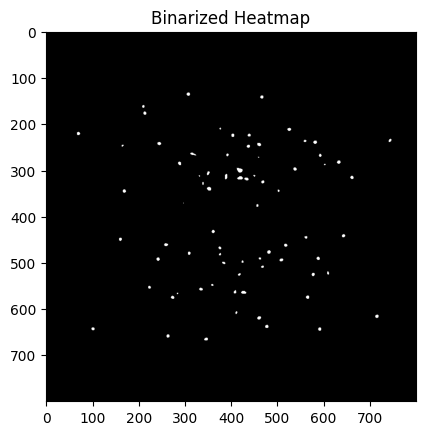

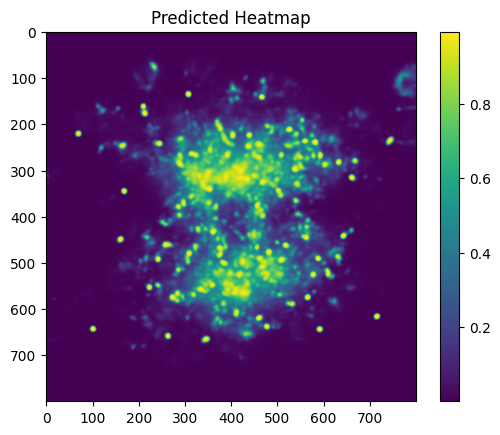

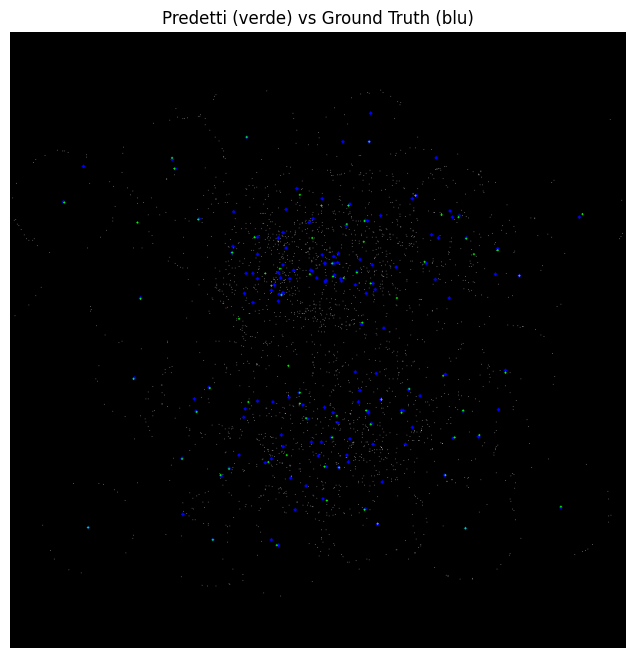

Threshold in pixels: 7.6 ==> precision: 0.8267, recall: 0.3974, f1-score: 0.5368


In [7]:
img_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px/images/val/event_8.npy'
csv_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px/centers/val/event_8_centers.csv'

from AttentionUnet import inference_image, img_kp_pred_and_gr, compute_pck_metrics, load_keypoints_from_csv

heatmap, keypoints_and_cov, time = inference_image(img_path, model, device=device, show_mask=True, show_heatmap=True, threshold=0.97, npy=True, sigmoid=True, beta=1)
keypoints = np.array([kp for kp, cov in keypoints_and_cov])

keypoints_gt = np.array(load_keypoints_from_csv(csv_path))

img_kp_pred_and_gr(keypoints_pred=keypoints, keypoints_gt=keypoints_gt, img_path=img_path)

pck_metrics = compute_pck_metrics(keypoints, keypoints_gt, thresholds=[7.6])
print(f'Threshold in pixels: 7.6 ==> precision: {pck_metrics[0][0]:.4f}, recall: {pck_metrics[1][0]:.4f}, f1-score: {pck_metrics[2][0]:.4f}')


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE/last.pth


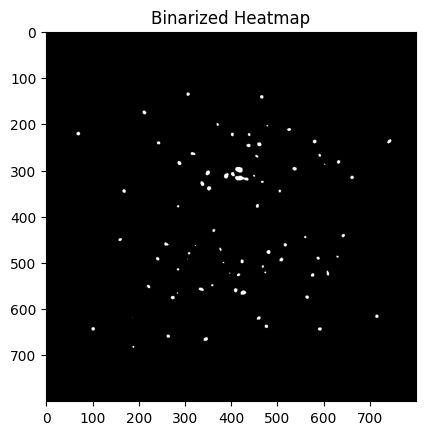

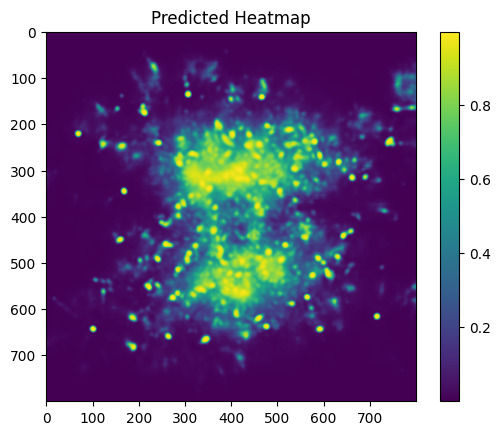

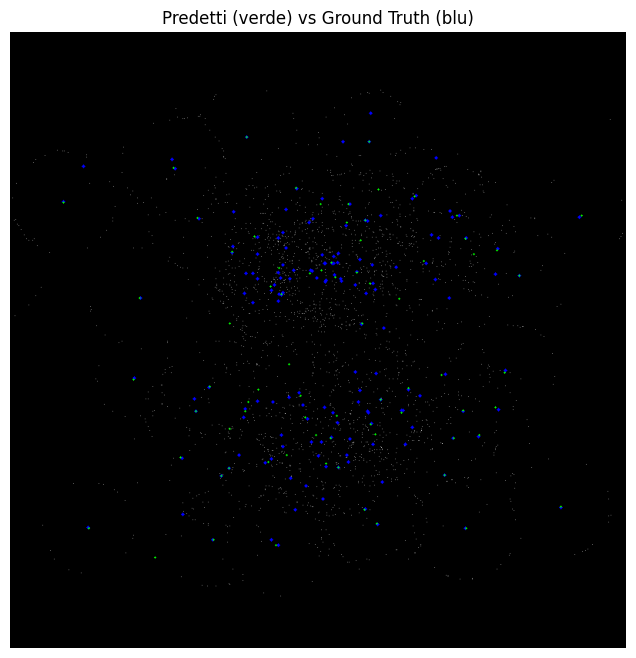

Threshold in pixels: 8 ==> precision: 0.8133, recall: 0.3910, f1-score: 0.5281
Time inference and keypoint extraction: 396.839 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE0.3L1/last.pth


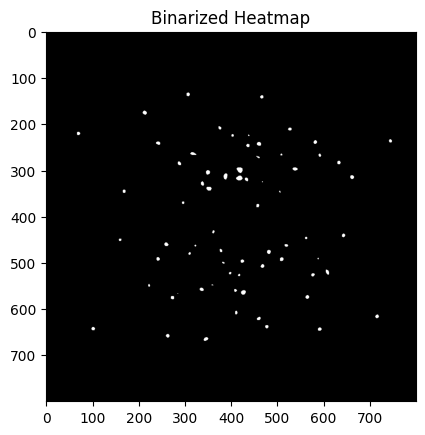

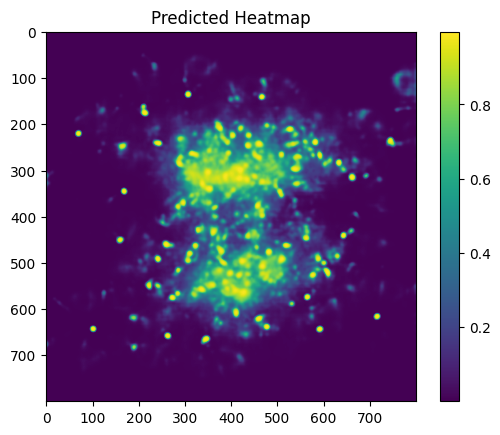

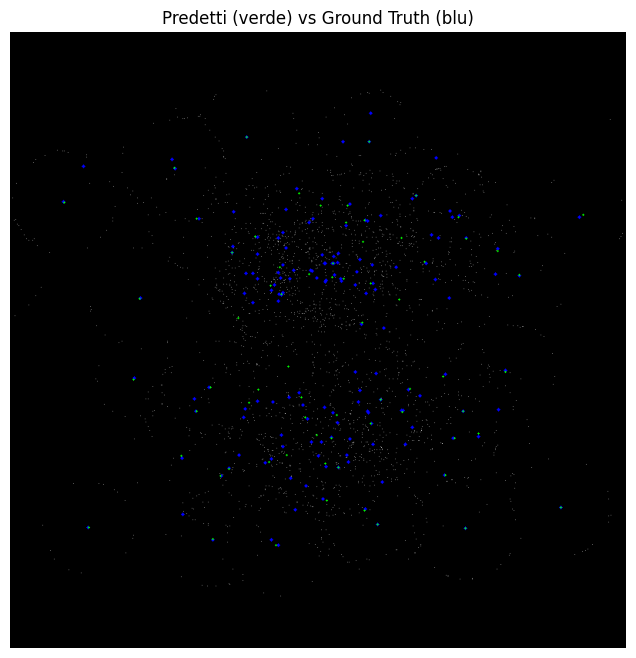

Threshold in pixels: 8 ==> precision: 0.8551, recall: 0.3782, f1-score: 0.5244
Time inference and keypoint extraction: 306.950 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE0.5L1/last.pth


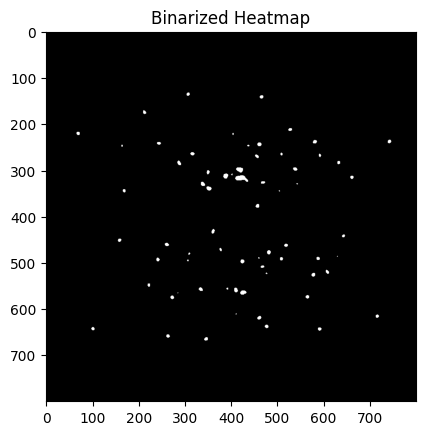

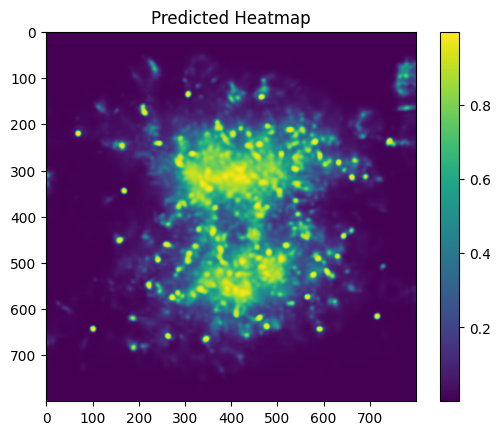

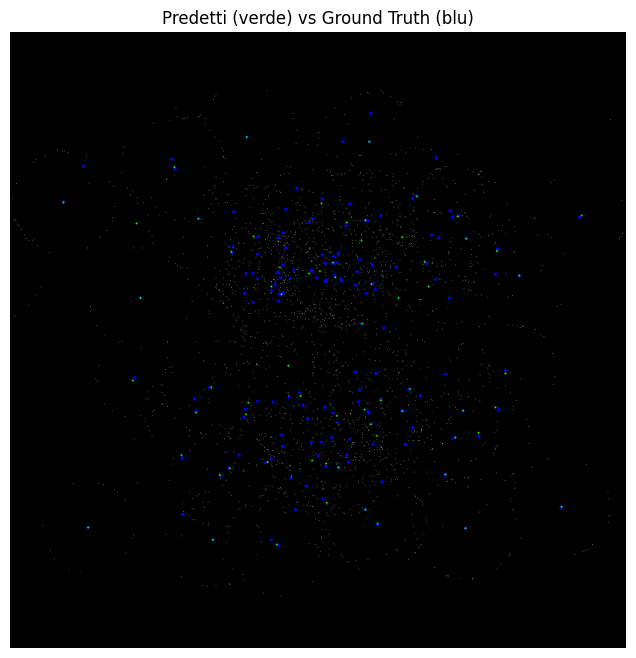

Threshold in pixels: 8 ==> precision: 0.8507, recall: 0.3654, f1-score: 0.5112
Time inference and keypoint extraction: 306.273 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCEL1/last.pth


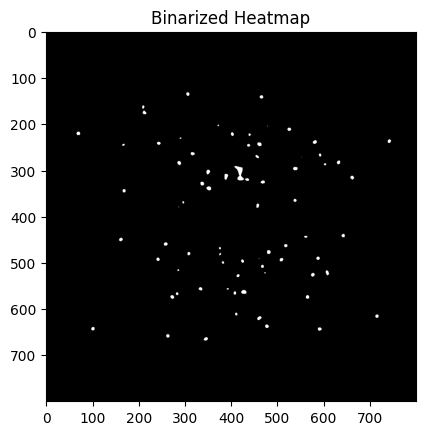

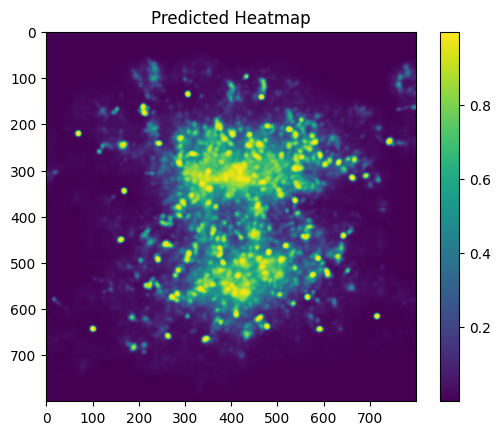

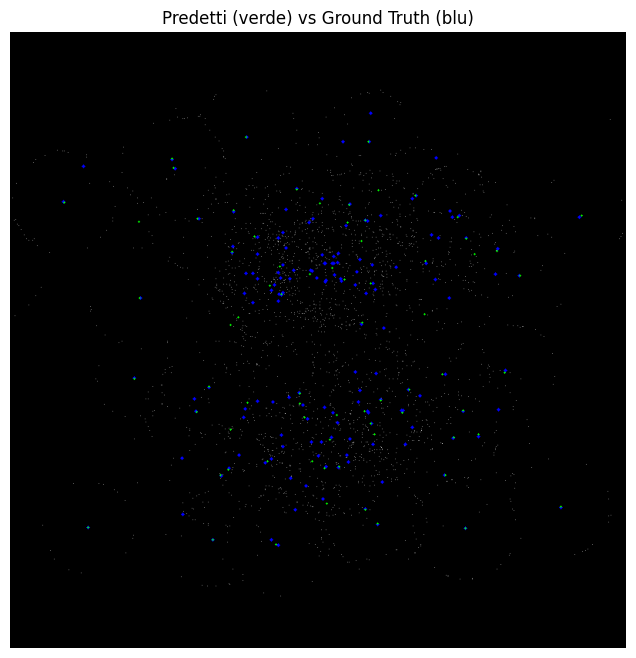

Threshold in pixels: 8 ==> precision: 0.8493, recall: 0.3974, f1-score: 0.5415
Time inference and keypoint extraction: 320.279 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE2L1/last.pth


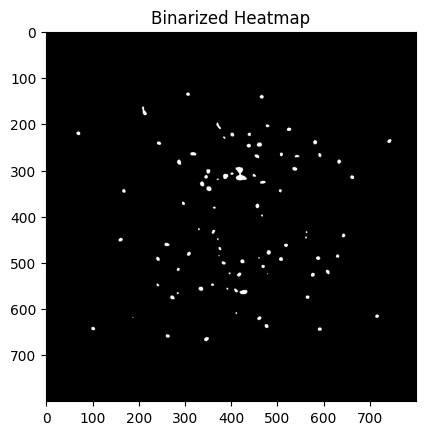

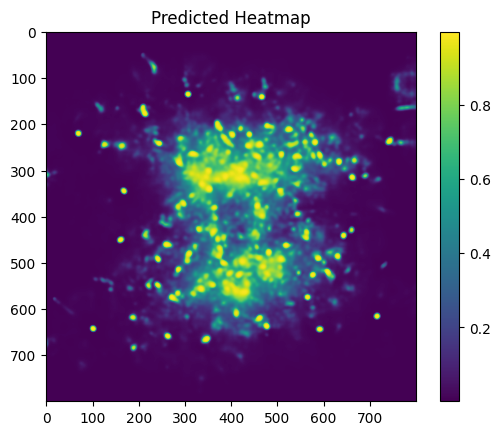

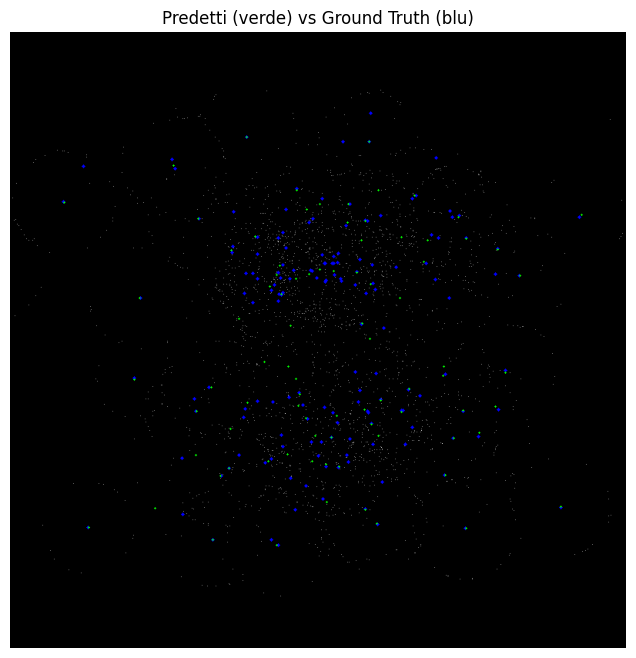

Threshold in pixels: 8 ==> precision: 0.7412, recall: 0.4038, f1-score: 0.5228
Time inference and keypoint extraction: 326.774 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE5L1/best_unet5.pth


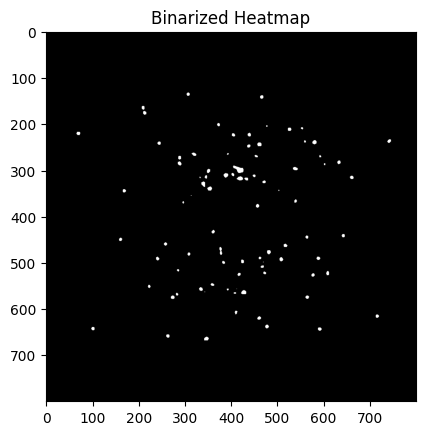

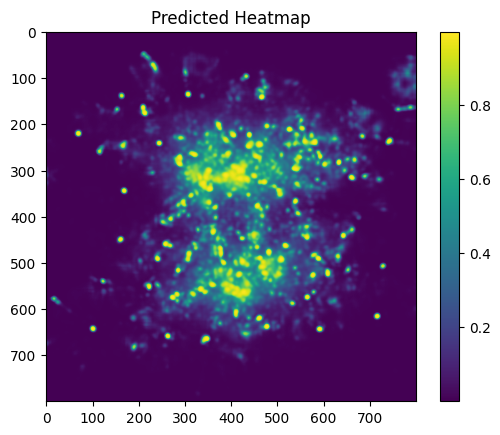

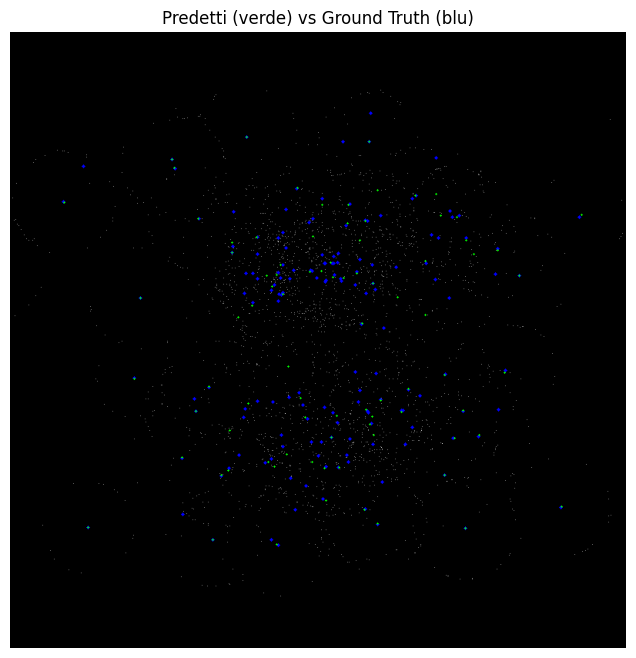

Threshold in pixels: 8 ==> precision: 0.7882, recall: 0.4295, f1-score: 0.5560
Time inference and keypoint extraction: 342.604 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/best_unet5.pth


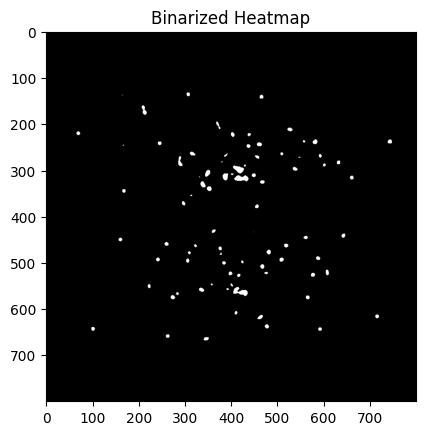

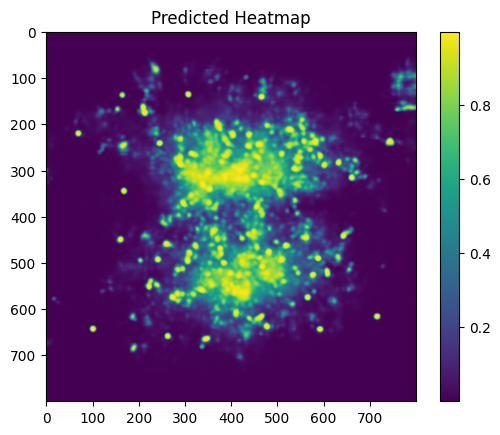

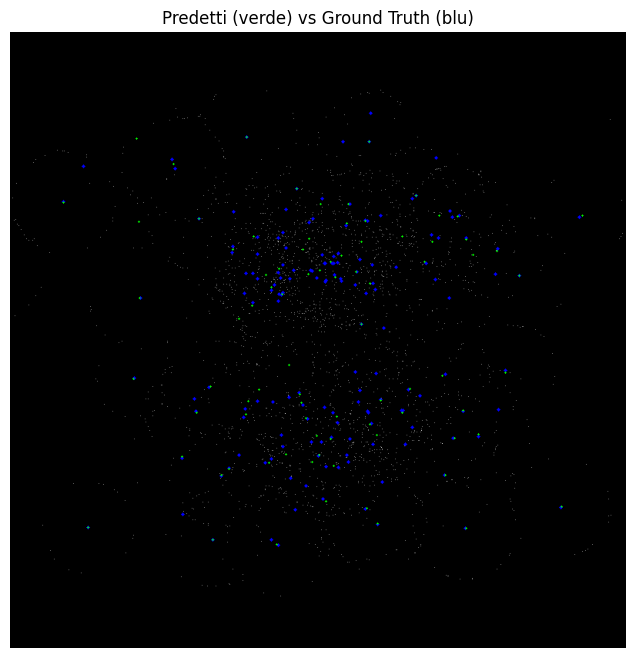

Threshold in pixels: 8 ==> precision: 0.7711, recall: 0.4103, f1-score: 0.5356
Time inference and keypoint extraction: 445.906 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/best_unet2.pth


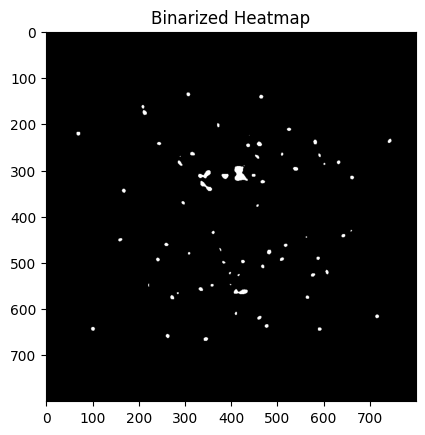

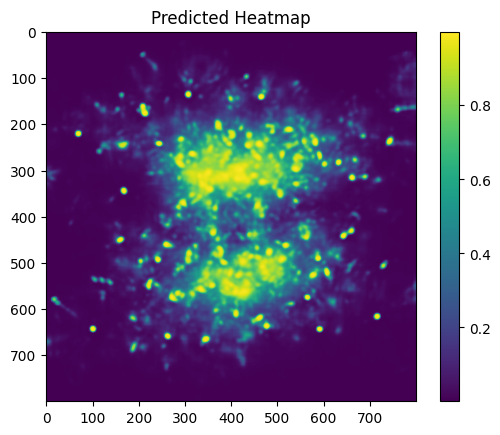

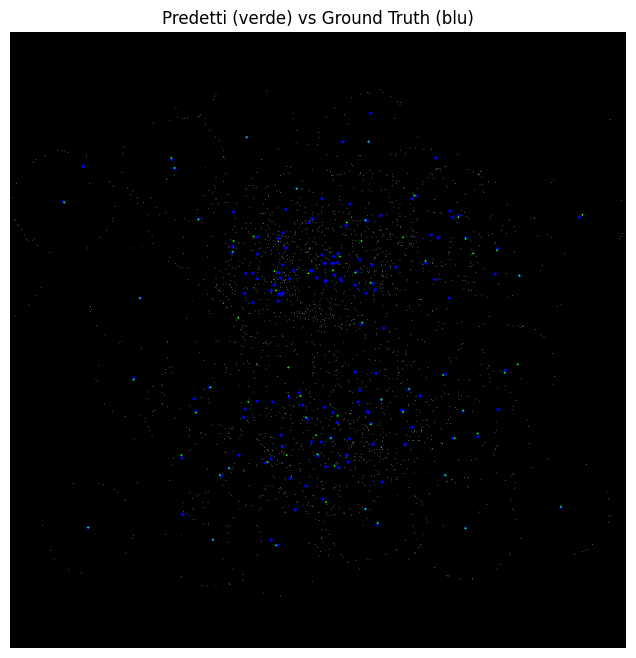

Threshold in pixels: 8 ==> precision: 0.8676, recall: 0.3782, f1-score: 0.5268
Time inference and keypoint extraction: 308.435 ms




In [3]:
# faccio il paragone tra i modelli
# 800px

model_path1 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE/last.pth'
model_path2 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE0.3L1/last.pth'
model_path3 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE0.5L1/last.pth'
model_path4 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCEL1/last.pth'
model_path5 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE2L1/last.pth'
model_path6 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE5L1/best_unet5.pth'
model_path7 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/best_unet5.pth'
model_path8 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/best_unet2.pth'

img_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px/images/val/event_8.npy'
keypoints_gt = load_keypoints_from_csv('/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px/centers/val/event_8_centers.csv')

for model_path in [model_path1, model_path2, model_path3, model_path4, model_path5, model_path6, model_path7, model_path8]:
    model = UNetWithAttention(in_channels=1, out_channels=1)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    
    print(f"Evaluating model: {model_path}")
    
    heatmap, keypoints_and_cov, time = inference_image(img_path, model, device=device, show_mask=True, threshold=0.97, npy=True, sigmoid=True, beta=1)
    keypoints = [kp for kp, cov in keypoints_and_cov]
    
    img_kp_pred_and_gr(keypoints_pred=keypoints, keypoints_gt=keypoints_gt, img_path=img_path)
    pck_metrics = compute_pck_metrics(keypoints, keypoints_gt, thresholds=[8])
    print(f'Threshold in pixels: 8 ==> precision: {pck_metrics[0][0]:.4f}, recall: {pck_metrics[1][0]:.4f}, f1-score: {pck_metrics[2][0]:.4f}')
    print(f'Time inference and keypoint extraction: {time*1000:.3f} ms')
    print("\n")

In [10]:
from AttentionUnet import UNetWithAttention, inference_image, inference_dataset

datapath = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px'
output_path = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/output'
model_path = '/user/gr1/delphi/dghezzi/best_unet4.pth'

stats = inference_dataset(
    datapath=datapath,
    model_path=model_path,
    output_path=output_path
)

In [11]:
print(stats['inference_time_array'])

[0.19048667 0.18997145 0.15713382 ... 0.25298643 0.19178367 0.14408231]


In [12]:
from AttentionUnet import binary_threshold_study

binary_threshold_study(
    dataset_path=datapath,
    model_path=model_path,
    log_dir=output_path,
    pixel_thresholds=[4,6,8,9]
)

==> Coefficient Binary Threshold: 0.850
Binary Threshold 0.85: Precision: 0.577, Recall: 0.394, F1: 0.467 @4px | Time: (296.2275 ± 0.6381) ms
Binary Threshold 0.85: Precision: 0.677, Recall: 0.462, F1: 0.548 @6px | Time: (296.2275 ± 0.6381) ms
Binary Threshold 0.85: Precision: 0.726, Recall: 0.496, F1: 0.589 @8px | Time: (296.2275 ± 0.6381) ms
Binary Threshold 0.85: Precision: 0.745, Recall: 0.509, F1: 0.604 @9px | Time: (296.2275 ± 0.6381) ms

==> Coefficient Binary Threshold: 0.855
Binary Threshold 0.855: Precision: 0.583, Recall: 0.394, F1: 0.470 @4px | Time: (294.3371 ± 0.6388) ms
Binary Threshold 0.855: Precision: 0.683, Recall: 0.462, F1: 0.551 @6px | Time: (294.3371 ± 0.6388) ms
Binary Threshold 0.855: Precision: 0.733, Recall: 0.495, F1: 0.590 @8px | Time: (294.3371 ± 0.6388) ms
Binary Threshold 0.855: Precision: 0.751, Recall: 0.508, F1: 0.605 @9px | Time: (294.3371 ± 0.6388) ms

==> Coefficient Binary Threshold: 0.860
Binary Threshold 0.86: Precision: 0.591, Recall: 0.395, F1

best binary threshold @4px is 0.89

In [ ]:
from AttentionUnet import inference_F1map_unet

f1_matrix = inference_F1map_unet(
    dataset_path=datapath,
    model_path=model_path,
    img_size=800,
    pixel_thresholds=[4,5,6,7,8,9],
    binary_thresholds=np.arange(0.80, 1, 0.005),
)


[INFO] Calcolo con binary_threshold=0.800 ...

[INFO] Calcolo con binary_threshold=0.805 ...

[INFO] Calcolo con binary_threshold=0.810 ...

[INFO] Calcolo con binary_threshold=0.815 ...

[INFO] Calcolo con binary_threshold=0.820 ...

[INFO] Calcolo con binary_threshold=0.825 ...

[INFO] Calcolo con binary_threshold=0.830 ...

[INFO] Calcolo con binary_threshold=0.835 ...

[INFO] Calcolo con binary_threshold=0.840 ...

[INFO] Calcolo con binary_threshold=0.845 ...

[INFO] Calcolo con binary_threshold=0.850 ...

[INFO] Calcolo con binary_threshold=0.855 ...

[INFO] Calcolo con binary_threshold=0.860 ...

[INFO] Calcolo con binary_threshold=0.865 ...

[INFO] Calcolo con binary_threshold=0.870 ...

[INFO] Calcolo con binary_threshold=0.875 ...

[INFO] Calcolo con binary_threshold=0.880 ...

[INFO] Calcolo con binary_threshold=0.885 ...

[INFO] Calcolo con binary_threshold=0.890 ...

[INFO] Calcolo con binary_threshold=0.895 ...

[INFO] Calcolo con binary_threshold=0.900 ...

[INFO] Calco